In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

%load_ext abjadext.ipython
import abjad

import numpy as np
from copy import deepcopy

from functools import partial, reduce
from itertools import accumulate
from fractions import Fraction
from random import shuffle, random, randint, choice

The abjadext.ipython extension is already loaded. To reload it, use:
  %reload_ext abjadext.ipython


In [27]:
def normalize(xs, a=0.0, b=1.0):
    return (b - a) * (xs - np.min(xs)) / (np.max(xs) - np.min(xs)) + a

def compose(*functions):
    return reduce(lambda g, f: lambda x: f(g(x)), functions, lambda x: x)

def rotate(l, n):
    return l[n:] + l[:n]

In [3]:
def fract(_xs, basis=None):
    if basis is None:
        basis = _xs
    new_xs = [normalize(_xs, basis[0], basis[1])[0]]
    
    for xi, xii in zip (basis[:-1], basis[1:]):
        new_xs += list(normalize(_xs, xi, xii))[1:]
      
    return new_xs

In [4]:
# xs = [0., 0.33, .75, 1.]
# ys = [-1., .75, -.33, 1.]
xs = [0., 3/12, 7/12, 1.]
ys = [-1., 3/12, -5/12, 1.]

In [218]:
xs = list(accumulate([random() for _ in range(5)]))
ys = [randint(-6, 6) for _ in range(5)]

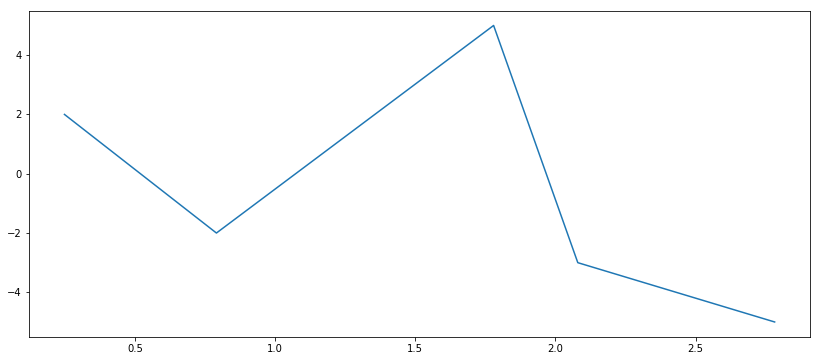

In [219]:
plt.figure(figsize=(14,6))
plt.plot(xs, ys)
plt.show()

In [220]:
mxs, mys = fract(xs), fract(ys)
# mxs, mys = fract(mxs), fract(mys)
# mxs, mys = fract(mxs), fract(mys)

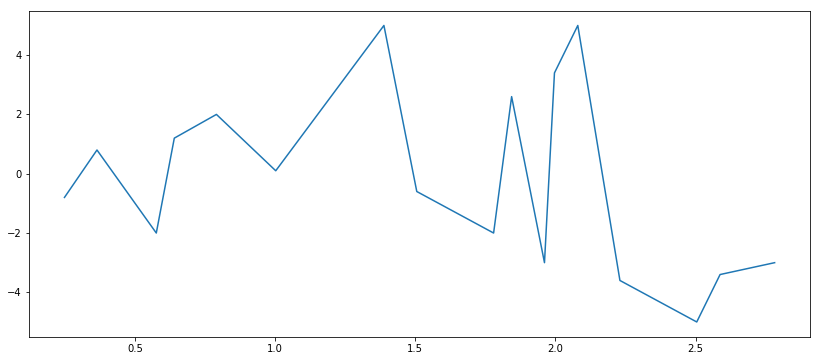

In [221]:
plt.figure(figsize=(14,6))
plt.plot(mxs, mys)
plt.show()

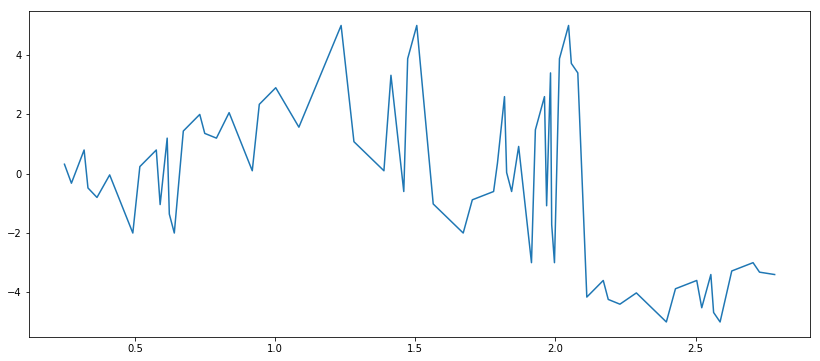

In [222]:
plt.figure(figsize=(14,6))
plt.plot(fract(mxs, xs), fract(mys, ys))
plt.show()

In [223]:
durs = [1, 2, 3, 4, 6, 8, 12]
pitches = ys # normalize(ys, -6., 6.)
durations = list(normalize(np.diff(xs), 0., 6.))  + [1.]
notes = [abjad.Note(pitch, abjad.Duration((durs[int(duration)], 32))) for (pitch, duration) in zip(pitches, durations)]

notes += [abjad.Rest((1, 4))]

#pitches = [2*y for y in mys]
pitches = normalize(mys, -9., 9.)
durations = list(normalize(np.diff(mxs), 0., 6.)) + [1.]
notes += [abjad.Note(pitch, abjad.Duration((durs[int(duration)], 32))) for (pitch, duration) in zip(pitches, durations)]

notes += [abjad.Rest((1, 4))]

# pitches = [3*y for y in fract(mys, ys)] 
pitches = normalize(fract(mys, ys), -12., 12.)
durations = list(normalize(np.diff(fract(mxs, xs)), 0., 6.)) + [1.]
notes += [abjad.Note(pitch, abjad.Duration((durs[int(duration)], 32))) for (pitch, duration) in zip(pitches, durations)]

staff_1 = abjad.Staff(notes)

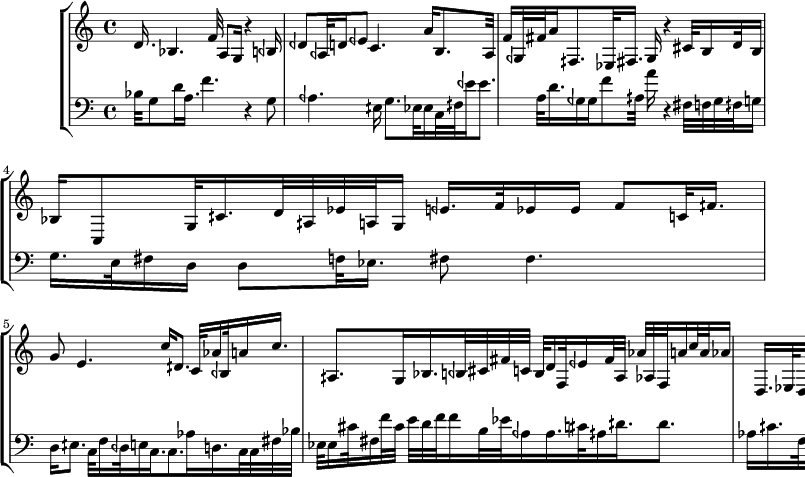

In [224]:
shuffle(ys)
mys = fract(ys)
pitches = ys # normalize(ys, -6., 6.)
durations = list(normalize(np.diff(xs), 0., 6.))  + [1.]
durations = rotate(durations, 2)
notes = [abjad.Note(pitch, abjad.Duration((durs[int(duration)], 32))) for (pitch, duration) in zip(pitches, durations)]

notes += [abjad.Rest((1, 4))]

# pitches = [2*y for y in mys]
pitches = normalize(mys, -9., 9.)
durations = list(normalize(np.diff(mxs), 0., 6.)) + [1.]
durations = rotate(durations, 4)
notes += [abjad.Note(pitch, abjad.Duration((durs[int(duration)], 32))) for (pitch, duration) in zip(pitches, durations)]

notes += [abjad.Rest((1, 4))]

# pitches = [3*y for y in fract(mys, ys)]
pitches = normalize(fract(mys, ys), -12., 12.)
durations = list(normalize(np.diff(fract(mxs, xs)), 0., 6.)) + [1.]
durations = rotate(durations, 8)
notes += [abjad.Note(pitch, abjad.Duration((durs[int(duration)], 32))) for (pitch, duration) in zip(pitches, durations)]

staff_2 = abjad.Staff(notes)

staff_group = abjad.StaffGroup([staff_1, staff_2])
leaf = abjad.inspect(staff_2).get_leaf(0)
abjad.attach(abjad.Clef('bass'), leaf)

score = abjad.Score()
score.append(staff_group)
show(score)

In [225]:
play(score)

<audio controls type="audio/ogg" src="data:audio/ogg;base64,T2dnUwACAAAAAAAAAAA732d0AAAAAFA0HwQBHgF2b3JiaXMAAAAAAkSsAAD/////APQBAP////+4AU9nZ1MAAIAAAAAAAAAAO99ndAEAAABUC5FlFI3/////////////////////PDkzA3ZvcmJpcywAAABYaXBoLk9yZyBsaWJWb3JiaXMgSSAyMDE1MDEwNSAo4puE4puE4puE4puEKQEAAABNAAAATE9DQVRJT049L3Zhci9mb2xkZXJzLzF5LzFyazY2cHE1MDQxMThxdnQxcmRydGp2ODAwMDBnbi9UL3RtcHNkYXJla3h6L291dC5vZ2cBBXZvcmJpcylCQ1YBAAgAAIAiTBjEgNCQVQAAEAAAoKw3lnvIvffee4GoRxR7iL333nvjrEfQeoi599577r2nGnvLvffecyA0ZBUAAAQAgCkImnLgQuq99x4Z5hFRGirHvfceGYWJMJQZhT2V2lrrIZPcQuo95x4IDVkFAAACAEAIIYQUUkghhRRSSCGFFFJIKaWYYooppphiyimnHHPMMccggw466KSTUEIJKaRQSiqppJRSSi3WWnPuvQfdc+9B+CCEEEIIIYQQQgghhBBCCEJDVgEAIAAABEIIIWQQQgghhBRSSCGmmGLKKaeA0JBVAAAgAIAAAAAASZEUy7EczdEczfEczxElURIl0TIt01I1UzM9VVRF1VRVV1VdXXdt1XZt1ZZt11Zt1XZt1VZtWbZt27Zt27Zt27Zt27Zt27ZtIDRkFQAgAQCgIzmSIymSIimS4ziSBISGrAIAZAAABACgKIrjOI7kSI4laZJmeZZniZqomZroqZ4KhIasAgAAAQAEAAAAAADgeIrneI5neZLneI5neZqnaZqmaZqmaZqmaZqmaZqmaZqmaZqmaZqmaZqmaZqmaZqmaZqmaZqmaZqmaUBoyCoAQAIAQMdxHMdxHMdxHEdyJAcIDVkFAMgAAAgAQFIkx3IsR3M0x3M8R3REx3RMyZRUybVcCwgNWQUAAAIACAAAAAAAQBMsRVM8x5M8zxM1z9M0zRNNUTRN0zRN0zRN0zRN0zRN0zRN0zRN0zRN0zRN0zRN0zRN0zRN0zRNUxSB0JBVAAAEAAAhnWaWaoAIM5BhIDRkFQCAAAAAGKEIQwwIDVkFAAAEAACIoeQgmtCa8805DprloKkUm9PBiVSbJ7mpmJtzzjnnnGzOGeOcc84pypnFoJnQmnPOSQyapaCZ0JpzznkSmwetqdKac84Z55wOxhlhnHPOadKaB6nZWJtzzlnQmuaouRSbc86JlJsntblUm3POOeecc84555xzzqlenM7BOeGcc86J2ptruQldnHPO+WSc7s0J4ZxzzjnnnHPOOeecc84JQkNWAQBAAAAEYdgYxp2CIH2OBmIUIaYhkx50jw6ToDHIKaQejY5GSqmDUFIZJ6V0gtCQVQAAIAAAhBBSSCGFFFJIIYUUUkghhhhiiCGnnHIKKqikkooqyiizzDLLLLPMMsusw84667DDEEMMMbTSSiw11VZjjbXmnnOuOUhrpbXWWiullFJKKaUgNGQVAAACAEAgZJBBBhmFFFJIIYaYcsopp6CCCggNWQUAAAIACAAAAPAkzxEd0REd0REd0REd0REdz/EcURIlURIl0TItUzM9VVRVV3ZtWZd127eFXdh139d939eNXxeGZVmWZVmWZVmWZVmWZVmWZQlCQ1YBACAAAABCCCGEFFJIIYWUYowxx5yDTkIJgdCQVQAAIACAAAAAAEdxFMeRHMmRJEuyJE3SLM3yNE/zNNETRVE0TVMVXdEVddMWZVM2XdM1ZdNVZdV2Zdm2ZVu3fVm2fd/3fd/3fd/3fd/3fd/XdSA0ZBUAIAEAoCM5kiIpkiI5juNIkgSEhqwCAGQAAAQAoCiO4jiOI0mSJFmSJnmWZ4maqZme6amiCoSGrAIAAAEABAAAAAAAoGiKp5iKp4iK54iOKImWaYmaqrmibMqu67qu67qu67qu67qu67qu67qu67qu67qu67qu67qu67qu67pAaMgqAEACAEBHciRHciRFUiRFciQHCA1ZBQDIAAAIAMAxHENSJMeyLE3zNE/zNNETPdEzPVV0RRcIDVkFAAACAAgAAAAAAMCQDEuxHM3RJFFSLdVSNdVSLVVUPVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVdU0TdM0gdCQlQAAGQAAw7Tk0nLPjaBIKke11pJR5STFHBqKoIJWcw0VNIhJiyFiCiEmMZYOOqac1BpTKRlzVHNsIVSISQ06plIpBi0IQkNWCAChGQAOxwEkywIkSwMAAAAAAAAASdMAzfMAy/MAAAAAAAAAQNI0wPI0QPM8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkTQM0zwM0zwMAAAAAAAAAzfMATxQBTxQBAAAAAAAAwPI8wBM9wBNFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcTQM0zwM0zwMAAAAAAAAAy/MATxQBzxMBAAAAAAAAQPM8wBNFwBNFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAQ4AAAEWQqEhKwKAOAEAhyRBkiBJ0DSAZFnQNGgaTBMgWRY0DZoG0wQAAAAAAAAAAABA8jRoGjQNogiQNA+aBk2DKAIAAAAAAAAAAAAgaRo0DZoGUQRImgZNg6ZBFAEAAAAAAAAAAADQTBOiCFGEaQI804QoQhRhmgAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAACAAQcAgAATykChISsCgDgBAIeiWBYAADiSY1kAAOA4kmUBAIBlWaIIAACWpYkiAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAIABBwCAABPKQKEhKwGAKAAAh6JYFnAcywKOY1lAkiwLYFkAzQNoGkAUAYAAAIACBwCAABs0JRYHKDRkJQAQBQDgUBTL0jRR5DiWpWmiyJEsS9NEkWVpmueZ

In [ ]:
score = abjad.Score()
piano_staff = abjad.StaffGroup([], context_name='PianoStaff')
upper_staff = abjad.Staff()
#lower_staff = abjad.Staff()

In [ ]:
piano_staff.append(upper_staff)
#piano_staff.append(lower_staff)
score.append(piano_staff)

In [ ]:
upper_measures = []
upper_measures.append(abjad.Measure((4, 4), []))

In [ ]:
upper_staff.extend(upper_measures)

In [ ]:
leaves = [abjad.Note(0, abjad.Duration(1, 8)),
          abjad.Note(0, abjad.Duration(1, 8)),
          abjad.Note(0, abjad.Duration(1, 8))]
tuplet = abjad.Tuplet((2, 3), leaves)
upper_measures[0].extend(tuplet)

In [ ]:
tuplet = abjad.Tuplet((2, 3), "c'8 d'8 e'8")

In [ ]:
upper_staff[:]

In [ ]:
rhythm_maker = abjad.rhythmmakertools.TaleaRhythmMaker(
    talea=abjad.rhythmmakertools.Talea(
        counts=[1, 2, 3, 4],
        denominator=16,
        ),
    )

In [ ]:
divisions = [(2, 8), (4, 8), (3, 8), (5, 8)]
selections = rhythm_maker(divisions)

In [ ]:
selections